# Aion Game Bot Detection

## 0. 분석 전 환경설정

info_df => Player information features  
group_df => Group activities features  
action_df => Player actions features

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd '/content/drive/MyDrive/Aion Game Bot Detection'

/content/drive/MyDrive/Aion Game Bot Detection


In [6]:
!pip install shap

In [7]:
import numpy as np
import pandas as pd

#### 데이터프레임 선언하기

In [8]:
info_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Player information features.csv', encoding='utf-8-sig', index_col=False)
info_df

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,Human
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,Human
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,Human
...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,1,1,12485,12485.0000,804.5126,1,1,11,Human
49735,472867,8186481,1,1,14698,14698.0000,369.5057,2,1,10,Human
49736,472887,6764910,1,1,15200,15200.0000,619.1027,4,1,11,Human
49737,472897,7083623,1,1,12157,12157.0000,41728.9706,4,1,10,Human


In [9]:
group_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Group activities features.csv', encoding='utf-8-sig', index_col=False)
group_df

,Actor,A_Acc,Avg_PartyTime,GuildAct_count,GuildJoin_count,Type
0,1047,6482393,6760.2061,1,0,Human
1,1049,6275719,4792.6923,2,0,Human
2,1120,6596993,5341.3333,0,0,Human
3,1164,6670686,4584.7143,0,0,Human
4,1184,4220231,6350.5000,0,0,Human
...,...,...,...,...,...,...
49734,472860,11369375,0.0000,0,0,Human
49735,472867,8186481,12803.0000,0,0,Human
49736,472887,6764910,0.0000,0,0,Human
49737,472897,7083623,0.0000,0,0,Human


In [10]:
action_df = pd.read_csv('/content/drive/MyDrive/Aion Game Bot Detection/dataset/Player actions features.csv', encoding='utf-8-sig', index_col=False)
action_df

,Actor,A_Acc,collect_max_count,Sit_ratio,Sit_count,sit_count_per_day,Exp_get_ratio,Exp_get_count,exp_get_count_per_day,Item_get_ratio,...,Use_portal_count_per_day,Killed_bypc_count,Killed_bypc_count_per_day,Killed_bynpc_count,Killed_bynpc_count_per_day,Teleport_count,Teleport_count_per_day,Reborn_count,Reborn_count_per_day,Type
0,1047,6482393,6,1.0430,1012,24.0952,15.5210,15060,358.5714,6.2847,...,0.0476,690,16.4286,172,4.0952,1051,25.0238,2,0.0476,Human
1,1049,6275719,0,3.5570,141,8.8125,13.6226,540,33.7500,6.9122,...,0.1250,30,1.8750,16,1.0000,118,7.3750,0,0.0000,Human
2,1120,6596993,3,4.9882,190,47.5000,15.6734,597,149.2500,13.5994,...,0.0000,0,0.0000,20,5.0000,37,9.2500,0,0.0000,Human
3,1164,6670686,0,0.8581,30,3.3333,17.8776,625,69.4444,6.8650,...,0.0000,26,2.8889,6,0.6667,61,6.7778,0,0.0000,Human
4,1184,4220231,4,4.2667,215,19.5455,18.0194,908,82.5455,8.0572,...,0.0000,6,0.5455,17,1.5455,54,4.9091,0,0.0000,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49734,472860,11369375,0,0.1745,2,2.0000,23.6475,271,271.0000,15.5323,...,0.0000,0,0.0000,3,3.0000,15,15.0000,0,0.0000,Human
49735,472867,8186481,10,0.3361,6,6.0000,21.5126,384,384.0000,15.0700,...,0.0000,0,0.0000,2,2.0000,16,16.0000,0,0.0000,Human
49736,472887,6764910,0,0.2565,10,10.0000,13.1606,513,513.0000,15.6747,...,0.0000,0,0.0000,4,4.0000,11,11.0000,0,0.0000,Human
49737,472897,7083623,19,0.0000,0,0.0000,16.1488,343,343.0000,17.8908,...,0.0000,0,0.0000,1,1.0000,10,10.0000,0,0.0000,Human


### 0. neptune.ai settings

In [11]:
!pip install neptune-client

## 1. 기초 데이터 분석 & 탐색적 데이터 분석
- 분석 목표 정의하기
- 독립변수 분포 확인
- 종속변수 분포 확인
- 독립변수 간 상관분석

### 두 가지 분석 목표 : Type Bot은 어떠한 패턴이 존재하는지 찾기
❗ (기본)일반 유저와 봇 유저의 차이점을 패턴으로 찾아내기  
❗ (심화)헤비 유저와 봇 유저 분리해보기

In [61]:
round(action_df['Type'].value_counts(normalize=True) * 100) # 전체 Type 별 비율 측정

Human    87.0
Bot      13.0
Name: Type, dtype: float64

In [59]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Actor                       49739 non-null  int64  
 1   A_Acc                       49739 non-null  int64  
 2   collect_max_count           49739 non-null  int64  
 3   Sit_ratio                   49739 non-null  float64
 4   Sit_count                   49739 non-null  int64  
 5   sit_count_per_day           49739 non-null  float64
 6   Exp_get_ratio               49739 non-null  float64
 7   Exp_get_count               49739 non-null  int64  
 8   exp_get_count_per_day       49739 non-null  float64
 9   Item_get_ratio              49739 non-null  float64
 10  Item_get_count              49739 non-null  int64  
 11  item_get_count_per_day      49739 non-null  float64
 12  Money_get_ratio             49739 non-null  float64
 13  Money_get_count             497

In [31]:
data = info_df.iloc[:, :-1]
data_corr = pd.DataFrame(data).corr(method='pearson')
data_corr.describe()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.003089,0.117214,0.391894,0.389364,0.378248,0.263957,0.150294,0.215273,0.235045,0.279279
std,0.445120,0.385375,0.440490,0.441806,0.337851,0.334197,0.322400,0.307368,0.359551,0.430083
min,-0.486035,-0.229043,-0.330761,-0.334659,-0.049029,-0.074440,-0.146636,-0.092028,-0.174130,-0.486035
25%,-0.291603,-0.139488,0.170112,0.162210,0.124105,0.062958,-0.010199,0.056846,-0.042728,0.096778
50%,-0.119332,-0.059292,0.414008,0.417239,0.318271,0.153762,0.077853,0.141609,0.139380,0.315832
75%,0.104396,0.268252,0.602754,0.594061,0.601971,0.304871,0.197497,0.290516,0.463501,0.562719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1584x1584 with 0 Axes>

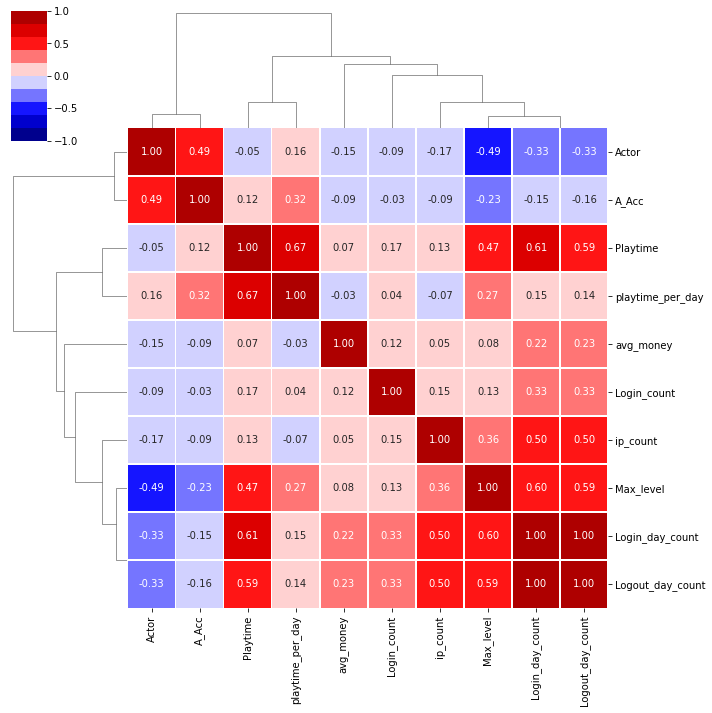

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

## 2. 가설 설정하기

1. 가설 : 봇 유저의 경우, 일별 경험치 획득 횟수와 일반 유저보다 훨씬 높을 것이다

In [34]:
action_bot = action_df[action_df['Type'] == 'Bot']
action_human = action_df[action_df['Type'] == 'Human'] 

In [46]:
bot_var = action_bot['exp_get_count_per_day'].var()
hum_var = action_human['exp_get_count_per_day'].var()
print(bot_var, hum_var)

4933819.172267431 119740.99381201957


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


(10000.0, 20000.0)

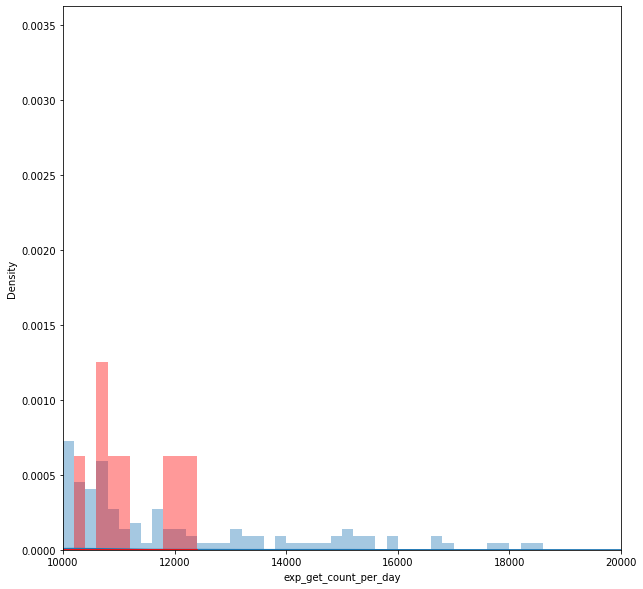

In [73]:
plt.figure(figsize=(10,10))
ax = sns.distplot(action_bot['exp_get_count_per_day'], kde=True, hist=True, hist_kws={"range": [10000, 20000]})
sns.distplot(action_human['exp_get_count_per_day'], kde=True, hist=True, hist_kws={"range": [10000, 20000]}, color="red")
ax.set_xlim(10000, 20000)

##3. 모델 구축하기
k-fold 교차검증 참고자료 : http://www.gisdeveloper.co.kr/?p=9932  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import shap

X_train, X_test, y_train, y_test = train_test_split(info_df.iloc[:, :-1], info_df.Type, test_size=0.1, stratify=info_df.Type, random_state=32)
y_train_Bot = (y_train == "Bot")
y_test_Bot = (y_test == "Bot")
params = { 'n_estimators' : [10, 50, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [13]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9532


In [14]:
from sklearn.metrics import accuracy_score

rf_clf_opt = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf_opt.fit(X_train, y_train)
pred = rf_clf_opt.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9554


In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(rf_clf_opt, X_train, y_train_Bot, cv=3)
cf = confusion_matrix(y_train_Bot, y_train_pred)
print(cf)

[[38784   356]
 [ 1741  3884]]


#### 랜덤 포레스트 시각화 

https://teddylee777.github.io/visualization/Decision-Tree%EA%B0%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%B6%84%ED%95%A0%ED%96%88%EB%8A%94%EC%A7%80-%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0(graphviz)

In [39]:
from sklearn.tree import export_graphviz
estimator = rf_clf_opt.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = action_df.columns[:-1],
                class_names = action_df.Type,
                max_depth = 4, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True # 박스의 모양을 둥글게
               )

In [40]:
!dot -Tpng tree.dot > tree.png

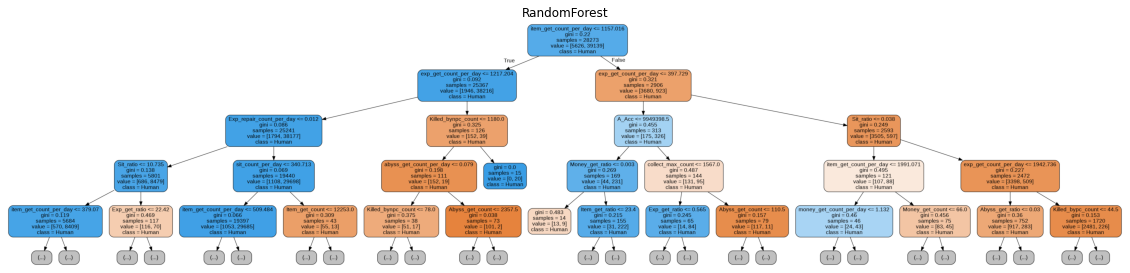

In [41]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

tree = mpimg.imread('tree.png')
plt.figure(figsize=(20, 5)) 
plt.title('RandomForest')
plt.axis('off')
plt.imshow(tree)

https://woolulu.tistory.com/28

#### 모델에서 중요하게 선택된 요소 탐색  

참고자료 : SHAP를 사용하여 Xai 모델 제작하기 (https://velog.io/@tobigs_xai/2%EC%A3%BC%EC%B0%A8-SHAP-SHapley-Additive-exPlanation)  
변수가 여러 개 일 경우 (https://hong-yp-ml-records.tistory.com/51)  

Feature importance
- playtime per day (일별 플레이 시간)  
- item get count per day (일별 아이템 획득량)
- exp get count per day (일별 경험치 획득량)  

Permutation imporance
- playtime per day (일별 플레이시간)
- avg_money (평균 재화)
-  exp_get_count_per_day (일별 경험치 획득량)

In [16]:
shap.initjs()
explainer = shap.TreeExplainer(rf_clf_opt)
shap_values = explainer.shap_values(X_train)

In [17]:
X_test.loc[[0]]

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51


In [18]:
choosen_instance = X_test.loc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)